In [67]:
import nengo
from nengo.utils.compat import is_number
from nengo.utils.ensemble import tuning_curves
from nengo.dists import Choice
from nengo.dists import Uniform
from nengo.utils.functions import piecewise
from nengo.utils.matplotlib import rasterplot


import nengo_gui
from nengo_gui.ipython import IPythonViz

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### Highpass Synapse Model

In [68]:
def highpass(tau, order=1):
    """Differentiated lowpass, raised to a given power."""
    if order < 1 or not is_number(order):
        raise ValueError("order (%s) must be integer >= 1" % order)
    num, den = map(np.poly1d, ([tau, 0], [tau, 1]))
    return nengo.LinearFilter(num**order, den**order)

### Different kinds of Oddballs
Oddball effect can be due to difference in any feature of the stimulus e.g., intensity, duration, inter-stimulus interval, silent gap instead of a stimulus etc.

In [83]:
tau_highpass = 0.5

isi = 10.0/1000.0
stim_dur = 4.0/1000.0
stim_value = 0.4 

model = nengo.Network(seed=12)
with model:        
    
    # No Oddball
    
    stim = nengo.Node(output=piecewise({0.5:stim_value, 0.5+stim_dur:0, 
                                        0.5+isi:stim_value, 0.5+isi+stim_dur:0, 
                                        0.5+2*isi:stim_value, 0.5+2*isi+stim_dur:0, 
                                        0.5+3*isi:stim_value, 0.5+3*isi+stim_dur:0, 
                                        0.5+4*isi:stim_value, 0.5+4*isi+stim_dur:0, 
                                        0.5+5*isi:stim_value, 0.5+5*isi+stim_dur:0,
                                        0.5+6*isi:stim_value, 0.5+6*isi+stim_dur:0, 
                                        0.5+7*isi:stim_value, 0.5+7*isi+stim_dur:0, 
                                        0.5+8*isi:stim_value, 0.5+8*isi+stim_dur:0, 
                                        0.5+9*isi:stim_value, 0.5+9*isi+stim_dur:0}))
    
    
    # Duration Oddball
    stim_duration = nengo.Node(output=piecewise({0.5:stim_value, 0.5+stim_dur:0, 
                                                 0.5+isi:stim_value, 0.5+isi+stim_dur:0, 
                                                 0.5+2*isi:stim_value, 0.5+2*isi+stim_dur:0, 
                                                 0.5+3*isi:stim_value, 0.5+3*isi+stim_dur:0, 
                                                 0.5+4*isi:stim_value, 0.5+4*isi+stim_dur:0, 
                                                 0.5+5*isi:stim_value, 0.5+5*isi+stim_dur:0,
                                                 0.5+6*isi:stim_value, 0.5+6*isi+stim_dur+0.5:0, 
                                                 0.5+7*isi:stim_value, 0.5+7*isi+stim_dur:0, 
                                                 0.5+8*isi:stim_value, 0.5+8*isi+stim_dur:0, 
                                                 0.5+9*isi:stim_value, 0.5+9*isi+stim_dur:0}))
    
    
    
    # Intensity Oddball
    stim_int = nengo.Node(output=piecewise({0.5:stim_value, 0.5+stim_dur:0, 
                                            0.5+isi:stim_value, 0.5+isi+stim_dur:0, 
                                            0.5+2*isi:stim_value, 0.5+2*isi+stim_dur:0, 
                                            0.5+3*isi:stim_value, 0.5+3*isi+stim_dur:0, 
                                            0.5+4*isi:stim_value, 0.5+4*isi+stim_dur:0, 
                                            0.5+5*isi:stim_value, 0.5+5*isi+stim_dur:0,
                                            0.5+6*isi:stim_value, 0.5+6*isi+stim_dur:0, 
                                            0.5+7*isi:stim_value+0.4, 0.5+7*isi+stim_dur:0, 
                                            0.5+8*isi:stim_value, 0.5+8*isi+stim_dur:0, 
                                            0.5+9*isi:stim_value, 0.5+9*isi+stim_dur:0}))
    
    
    # ISI Oddball
    stim_isi = nengo.Node(output=piecewise({0.5:stim_value, 0.5+stim_dur:0, 
                                            0.5+isi:stim_value, 0.5+isi+stim_dur:0, 
                                            0.5+2*isi:stim_value, 0.5+2*isi+stim_dur:0, 
                                            0.5+3*isi:stim_value, 0.5+3*isi+stim_dur:0, 
                                            0.5+4*isi:stim_value, 0.5+4*isi+stim_dur:0, 
                                            0.5+5*isi:stim_value, 0.5+5*isi+stim_dur:0,
                                            0.5+7*isi:stim_value, 0.5+7*isi+stim_dur:0, 
                                            0.5+9*isi:stim_value, 0.5+9*isi+stim_dur:0, 
                                            0.5+10*isi:stim_value, 0.5+10*isi+stim_dur:0, 
                                            0.5+11*isi:stim_value, 0.5+11*isi+stim_dur:0}))
    
   
    # Silent gap instead of a stimulus Oddball
    stim_gap = nengo.Node(output=piecewise({0.5:stim_value, 0.5+stim_dur:0, 
                                            0.5+isi:stim_value, 0.5+isi+stim_dur:0, 
                                            0.5+2*isi:stim_value, 0.5+2*isi+stim_dur:0, 
                                            0.5+3*isi:stim_value, 0.5+3*isi+stim_dur:0, 
                                            0.5+4*isi:stim_value, 0.5+4*isi+stim_dur:0, 
                                            0.5+5*isi:stim_value, 0.5+5*isi+stim_dur:0,
                                            0.5+7*isi:stim_value, 0.5+7*isi+stim_dur:0, 
                                            0.5+8*isi:stim_value, 0.5+8*isi+stim_dur:0, 
                                            0.5+8*isi:stim_value, 0.5+8*isi+stim_dur:0, 
                                            0.5+9*isi:stim_value, 0.5+9*isi+stim_dur:0}))
    
    
        
    result_stim = nengo.Ensemble(200, dimensions=1) 
    nengo.Connection(stim, result_stim, synapse=highpass(tau_highpass))
    stim_p = nengo.Probe(stim, synapse=None)
    result_stim_p = nengo.Probe(result_stim, synapse=0.01)
    
    result_dur = nengo.Ensemble(200, dimensions=1) 
    nengo.Connection(stim_duration, result_dur, synapse=highpass(tau_highpass))
    stim_dur_p = nengo.Probe(stim_duration, synapse=None)
    result_dur_p = nengo.Probe(result_dur, synapse=0.01)
    
    result_int = nengo.Ensemble(200, dimensions=1) 
    nengo.Connection(stim_int, result_int, synapse=highpass(tau_highpass))
    stim_int_p = nengo.Probe(stim_int, synapse=None)
    result_int_p = nengo.Probe(result_int, synapse=0.01)
    
    result_isi = nengo.Ensemble(200, dimensions=1) 
    nengo.Connection(stim_isi, result_isi, synapse=highpass(tau_highpass))
    stim_isi_p = nengo.Probe(stim_isi, synapse=None)
    result_isi_p = nengo.Probe(result_isi, synapse=0.01)
    
    result_gap = nengo.Ensemble(200, dimensions=1) 
    nengo.Connection(stim_gap, result_gap, synapse=highpass(tau_highpass))
    stim_gap_p = nengo.Probe(stim_gap, synapse=None)
    result_gap_p = nengo.Probe(result_gap, synapse=0.01)
    
    
sim = nengo.Simulator(model)
sim.run(1)   

Building finished in 0:00:01.                                                   
Simulating finished in 0:00:01.                                                 


(0.4, 0.7)

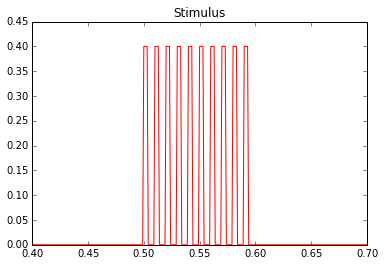

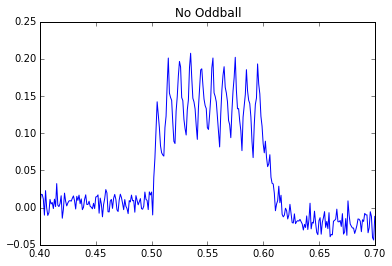

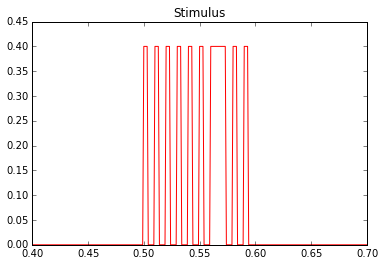

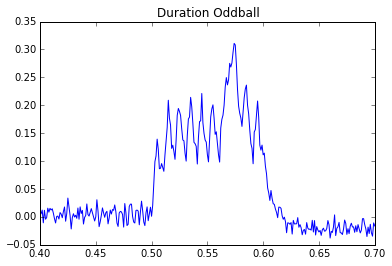

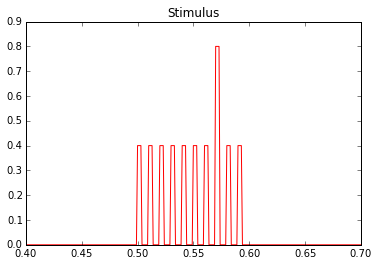

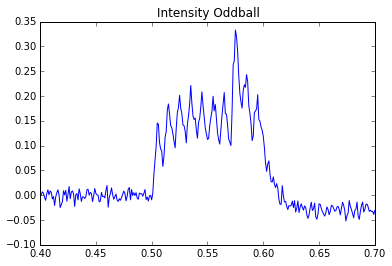

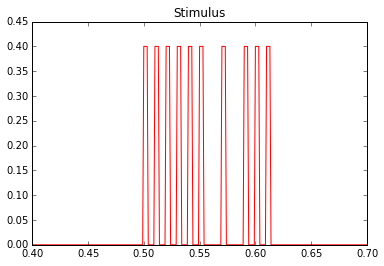

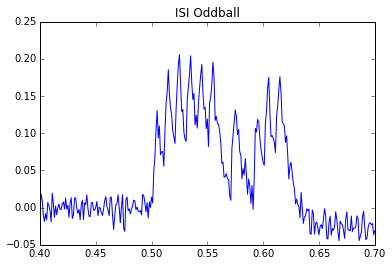

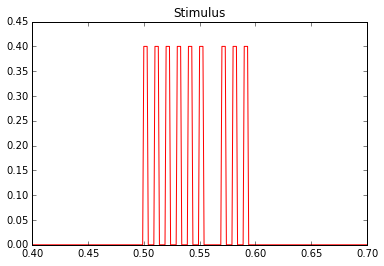

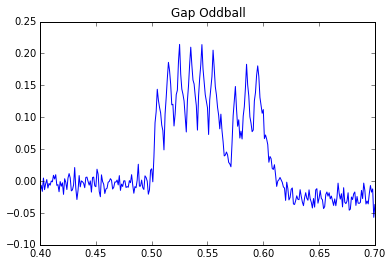

In [85]:
t = sim.trange()

plt.figure()
plt.plot(t, sim.data[stim_p], 'r')
plt.title("Stimulus")
plt.xlim(0.4, 0.7)
plt.figure()
plt.plot(t, sim.data[result_stim_p])
plt.title("No Oddball")
plt.xlim(0.4, 0.7)

plt.figure()
plt.plot(t, sim.data[stim_dur_p], 'r')
plt.title("Stimulus")
plt.xlim(0.4, 0.7)
plt.figure()
plt.plot(t, sim.data[result_dur_p])
plt.title("Duration Oddball")
plt.xlim(0.4, 0.7)

plt.figure()
plt.plot(t, sim.data[stim_int_p], 'r')
plt.title("Stimulus")
plt.xlim(0.4, 0.7)
plt.figure()
plt.plot(t, sim.data[result_int_p])
plt.title("Intensity Oddball")
plt.xlim(0.4, 0.7)

plt.figure()
plt.plot(t, sim.data[stim_isi_p], 'r')
plt.title("Stimulus")
plt.xlim(0.4, 0.7)
plt.figure()
plt.plot(t, sim.data[result_isi_p])
plt.title("ISI Oddball")
plt.xlim(0.4, 0.7)

plt.figure()
plt.plot(t, sim.data[stim_gap_p], 'r')
plt.title("Stimulus")
plt.xlim(0.4, 0.7)
plt.figure()
plt.plot(t, sim.data[result_gap_p])
plt.title("Gap Oddball")
plt.xlim(0.4, 0.7)

### Thresholded Ensemble
Eventually we will need Populations of neurons tuned to specific stimuli, so enlisting some of the ways I can get that (assuming we are thinking about intensity oddball).

In [62]:
tau_highpass = 0.5

isi = 10.0/1000.0
stim_dur = 4.0/1000.0
stim_value = 0.4 


# create a configuration for a threshold of 0.6
thresh_config = nengo.presets.ThresholdingEnsembles(threshold=0.6, radius=1)

model = nengo.Network()
with model:
    
    stim = nengo.Node(output=piecewise({0.5:stim_value, 0.5+stim_dur:0}))
    test = nengo.Ensemble(200, dimensions=1, radius=0.5)
    test.encoders = Choice([[1]])
    test.intercepts = nengo.dists.Uniform(0, 1)
 
    with thresh_config:
        test2 = nengo.Ensemble(200, dimensions=1)
    
    nengo.Connection(stim, test, synapse=highpass(tau_highpass))
    nengo.Connection(stim, test2, synapse=highpass(tau_highpass))
    
    stim_p = nengo.Probe(stim, synapse=None)
    test_p = nengo.Probe(test, synapse=0.1)
    test2_p = nengo.Probe(test2, synapse=0.1)

sim = nengo.Simulator(model)
sim.run(1)  

Building finished in 0:00:01.                                                   
Simulating finished in 0:00:01.                                                 


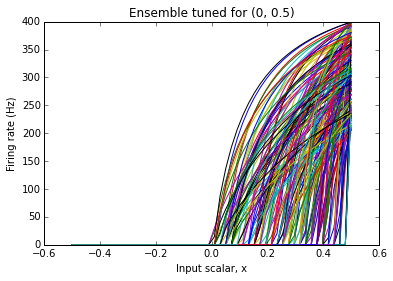

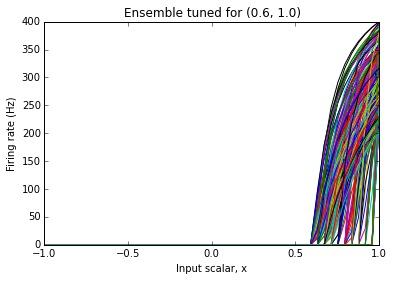

In [63]:
with sim:
    plt.figure()
    plt.plot(*tuning_curves(test, sim))
    plt.ylabel("Firing rate (Hz)")
    plt.xlabel("Input scalar, x")
    plt.title("Ensemble tuned for (0, 0.5)")
    
    plt.figure()
    plt.plot(*tuning_curves(test2, sim))
    plt.ylabel("Firing rate (Hz)")
    plt.xlabel("Input scalar, x")
    plt.title("Ensemble tuned for (0.6, 1.0)")

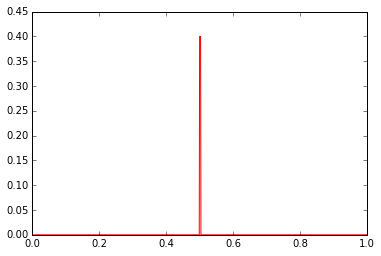

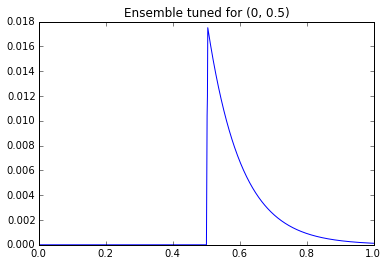

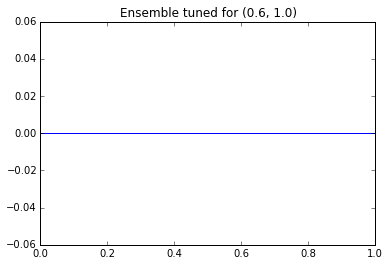

In [64]:
t = sim.trange()
plt.figure()
plt.plot(t, sim.data[stim_p], 'r')
#plt.xlim(0.4, 0.6)

plt.figure()
plt.title("Ensemble tuned for (0, 0.5)")
plt.plot(t, sim.data[test_p])
#plt.xlim(0.4, 0.6)

plt.figure()
plt.title("Ensemble tuned for (0.6, 1.0)")
plt.plot(t, sim.data[test2_p])
#plt.xlim(0.4, 0.6)

### Oddball Model
Using variation in intensity of the stimulus as an oddball.

In [87]:
# create a configuration for a threshold of 0.3
thresh_config = nengo.presets.ThresholdingEnsembles(threshold=0.6, radius=1)

tau_highpass = 0.5

isi = 10.0/1000.0
stim_dur = 4.0/1000.0
stim_value = 0.4


model = nengo.Network(seed=12)
with model:
    
    rev = 0.4 #2 #constant
    # Intensity Oddball
    stim_std = nengo.Node(output=piecewise({0.5:stim_value, 0.5+stim_dur:0, 
                                            0.5+isi:stim_value, 0.5+isi+stim_dur:0, 
                                            0.5+2*isi:stim_value, 0.5+2*isi+stim_dur:0, 
                                            0.5+3*isi:stim_value, 0.5+3*isi+stim_dur:0, 
                                            0.5+4*isi:stim_value, 0.5+4*isi+stim_dur:0, 
                                            0.5+5*isi:stim_value+rev, 0.5+5*isi+stim_dur:0,
                                            0.5+6*isi:stim_value, 0.5+6*isi+stim_dur:0, 
                                            0.5+7*isi:stim_value, 0.5+7*isi+stim_dur:0, 
                                            0.5+8*isi:stim_value, 0.5+8*isi+stim_dur:0, 
                                            0.5+9*isi:stim_value, 0.5+9*isi+stim_dur:0}))
                    
    
    
    # Intensity Oddball - Reversed
    stim_dev = nengo.Node(output=piecewise({0.5:stim_value+rev, 0.5+stim_dur:0, 
                                            0.5+isi:stim_value+rev, 0.5+isi+stim_dur:0, 
                                            0.5+2*isi:stim_value+rev, 0.5+2*isi+stim_dur:0, 
                                            0.5+3*isi:stim_value+rev, 0.5+3*isi+stim_dur:0, 
                                            0.5+4*isi:stim_value+rev, 0.5+4*isi+stim_dur:0, 
                                            0.5+5*isi:stim_value, 0.5+5*isi+stim_dur:0,
                                            0.5+6*isi:stim_value+rev, 0.5+6*isi+stim_dur:0, 
                                            0.5+7*isi:stim_value+rev, 0.5+7*isi+stim_dur:0, 
                                            0.5+8*isi:stim_value+rev, 0.5+8*isi+stim_dur:0, 
                                            0.5+9*isi:stim_value+rev, 0.5+9*isi+stim_dur:0}))
    
  
    result_std = nengo.Ensemble(200, dimensions=1) 
    nengo.Connection(stim_std, result_std, synapse=highpass(tau_highpass))
    
    result_std.radius = 0.5
    result_std.encoders = Choice([[1]])
    result_std.intercepts = nengo.dists.Uniform(0, 1)
    

    with thresh_config:
        result_dev = nengo.Ensemble(200, dimensions=1)
    nengo.Connection(stim_dev, result_dev, synapse=highpass(tau_highpass))
    

    stim_std_p = nengo.Probe(stim_std, synapse=None)
    result_std_p = nengo.Probe(result_std, synapse=0.01)
    
    stim_dev_p = nengo.Probe(stim_dev, synapse=None)
    result_dev_p = nengo.Probe(result_dev, synapse=0.01)
    
    # Compute MMN in an ensemble or a node
    mmn = nengo.Ensemble(200, dimensions=1) 
    #mmn = nengo.Node(size_in=1)
    nengo.Connection(result_std, mmn, transform=-1)
    nengo.Connection(result_dev, mmn, transform=1)

    mmn_p = nengo.Probe(mmn, synapse=0.01)
    
    # Spikes
    mmn_spikes_p = nengo.Probe(mmn.neurons)
    
    
sim = nengo.Simulator(model)
sim.run(1)   

Building finished in 0:00:01.                                                   
Simulating finished in 0:00:01.                                                 


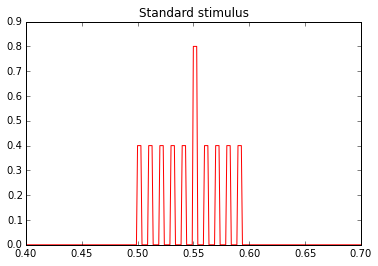

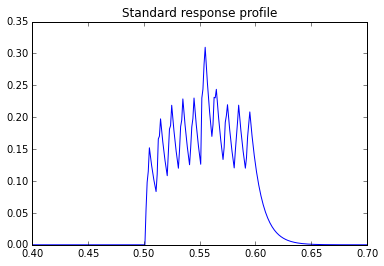

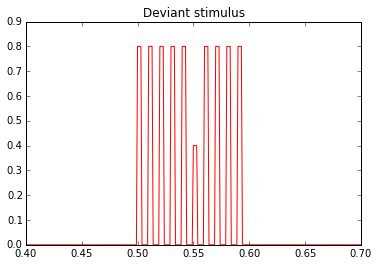

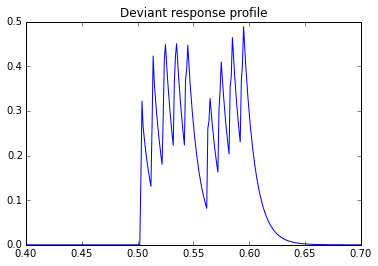

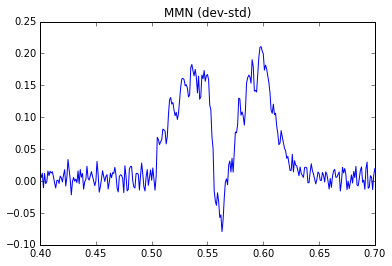

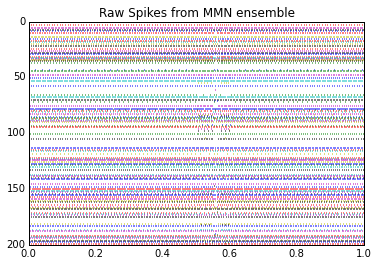

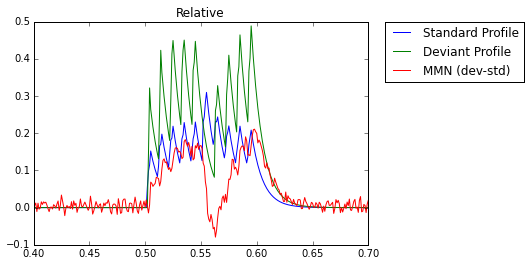

In [99]:
t = sim.trange()

plt.figure()
plt.plot(t, sim.data[stim_std_p], 'r')
plt.title("Standard stimulus")
plt.xlim(0.4, 0.7)

plt.figure()
plt.plot(t, sim.data[result_std_p])
plt.title("Standard response profile")
plt.xlim(0.4, 0.7)

plt.figure()
plt.plot(t, sim.data[stim_dev_p], 'r')
plt.title("Deviant stimulus")
plt.xlim(0.4, 0.7)

plt.figure()
plt.plot(t, sim.data[result_dev_p])
plt.title("Deviant response profile")
plt.xlim(0.4, 0.7)

plt.figure()
plt.title("MMN")
plt.plot(t, sim.data[mmn_p])
plt.title("MMN (dev-std)")
plt.xlim(0.4, 0.7)

plt.figure()
rasterplot(t, sim.data[mmn_spikes_p])
plt.title("Raw Spikes from MMN ensemble")


#################### Comparison ################## 

plt.figure()
plt.plot(t, sim.data[result_std_p], label="Standard Profile")
plt.xlim(0.4, 0.7)

plt.plot(t, sim.data[result_dev_p], label="Deviant Profile")
plt.xlim(0.4, 0.7)

plt.title("Relative")
plt.plot(t, sim.data[mmn_p], label="MMN (dev-std)")
plt.xlim(0.4, 0.7)
plt.legend(["Standard Profile","Deviant Profile","MMN (dev-std)"] , bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)


In [91]:
IPythonViz(model)

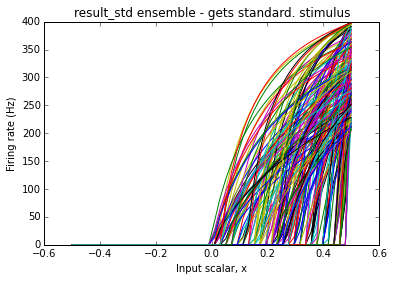

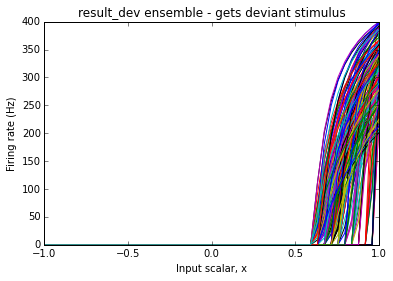

In [92]:
# plot ensemble tuning curves
with sim:
    plt.figure()
    plt.plot(*tuning_curves(result_std, sim))
    plt.ylabel("Firing rate (Hz)")
    plt.xlabel("Input scalar, x")
    plt.title("result_std ensemble - gets standard. stimulus")

    plt.figure()
    plt.plot(*tuning_curves(result_dev, sim))
    plt.ylabel("Firing rate (Hz)")
    plt.xlabel("Input scalar, x")
    plt.title("result_dev ensemble - gets deviant stimulus")